# Guide
With the bad result of the notebook before we have the idea of change to de dataset2 because at this point we think that the Dataset 1 maybe is useless because have a bad quality

We try to use time series prediction but analyzing with pacf y acf we notice that there is not a good correlation so is not a good idea to continue on this side.


# Preconfiguration
To execute - First create a service account and save in Google Drive, after change next data

In [5]:
#Modify after MyDrive providing folders and file name
service_account_location = "drive/MyDrive/Ideas/movilidad/vacio-276411-service_account_for_colab.json"

# Imports

In [6]:
pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#BIGQUERY IMPORTS
from google.cloud import bigquery #For bigquerycredentials
from google.oauth2 import service_account #For credentials


##Mount access to Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#Set credentials as global
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= service_account_location

# Construct a BigQuery client object.
client = bigquery.Client()

Mounted at /content/drive


# Get data

In [9]:
query = """
SELECT 
    latitude_start_r,
    longitude_start_r,
    date,
    hour,
    trips 
  FROM `vacio-276411.mainDataset.V2_model_data_latlon2_hour_trips_MADRID`
"""
df_ts = client.query(query).to_dataframe()

In [37]:
df_ts

,latitude_start_r,longitude_start_r,date,hour,trips
datetime,,,,,
2022-06-11 00,40.41,-3.71,2022-06-11,0,0
2022-06-11 00,40.47,-3.62,2022-06-11,0,0
2022-06-11 00,40.43,-3.71,2022-06-11,0,0
2022-06-11 00,40.39,-3.68,2022-06-11,0,0
2022-06-11 00,40.49,-3.69,2022-06-11,0,0
...,...,...,...,...,...
2022-08-31 23,40.43,-3.70,2022-08-31,23,0
2022-08-31 23,40.47,-3.66,2022-08-31,23,0
2022-08-31 23,40.45,-3.65,2022-08-31,23,0


In [10]:
df_ts.dtypes

latitude_start_r     object
longitude_start_r    object
date                 object
hour                  int64
trips                 int64
dtype: object

In [11]:
##Convert latitude and longitude to number
df_ts['latitude_start_r'] = df_ts['latitude_start_r'].astype(str).astype(float)
df_ts['longitude_start_r'] = df_ts['longitude_start_r'].astype(str).astype(float)
#Convert date colum to datetime type
df_ts["date"] = pd.to_datetime(df_ts["date"], format='%Y-%m-%d')

In [12]:
df_ts.dtypes

latitude_start_r            float64
longitude_start_r           float64
date                 datetime64[ns]
hour                          int64
trips                         int64
dtype: object

In [13]:
#Create datetime colum
df_ts["datetime"]  = df_ts["date"].dt.strftime('%Y-%m-%d') + " " + df_ts["hour"].apply(str).str.zfill(2)
pd.to_datetime(df_ts["datetime"])
df_ts

,latitude_start_r,longitude_start_r,date,hour,trips,datetime
0,40.41,-3.71,2022-06-11,0,0,2022-06-11 00
1,40.41,-3.71,2022-06-11,1,0,2022-06-11 01
2,40.41,-3.71,2022-06-11,2,0,2022-06-11 02
3,40.41,-3.71,2022-06-11,3,0,2022-06-11 03
4,40.41,-3.71,2022-06-11,4,0,2022-06-11 04
...,...,...,...,...,...,...
289291,40.38,-3.60,2022-08-31,19,0,2022-08-31 19
289292,40.38,-3.60,2022-08-31,20,0,2022-08-31 20
289293,40.38,-3.60,2022-08-31,21,0,2022-08-31 21
289294,40.38,-3.60,2022-08-31,22,0,2022-08-31 22


In [14]:
#Select a interesting point of data
df_ts_trendy =  df_ts[ (df_ts.latitude_start_r == 40.44) & (df_ts.longitude_start_r == -3.68)]
df_ts_trendy

,latitude_start_r,longitude_start_r,date,hour,trips,datetime
80688,40.44,-3.68,2022-06-11,0,0,2022-06-11 00
80689,40.44,-3.68,2022-06-11,1,0,2022-06-11 01
80690,40.44,-3.68,2022-06-11,2,0,2022-06-11 02
80691,40.44,-3.68,2022-06-11,3,0,2022-06-11 03
80692,40.44,-3.68,2022-06-11,4,0,2022-06-11 04
...,...,...,...,...,...,...
82651,40.44,-3.68,2022-08-31,19,0,2022-08-31 19
82652,40.44,-3.68,2022-08-31,20,0,2022-08-31 20
82653,40.44,-3.68,2022-08-31,21,0,2022-08-31 21
82654,40.44,-3.68,2022-08-31,22,0,2022-08-31 22


In [15]:
df_ts_trendy.dtypes

latitude_start_r            float64
longitude_start_r           float64
date                 datetime64[ns]
hour                          int64
trips                         int64
datetime                     object
dtype: object

In [16]:
#Select a interesting point of data
df_ts_trendy =  df_ts[ (df_ts.latitude_start_r == 40.44) & (df_ts.longitude_start_r == -3.68)]

# Time Series

In [17]:
#Import libraries to analyze using autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [18]:
#Set the column datetime as index and sort the dataset by datetime ascendent
df_ts_trendy.set_index('datetime', inplace=True)
df_ts_trendy.sort_index(inplace=True)

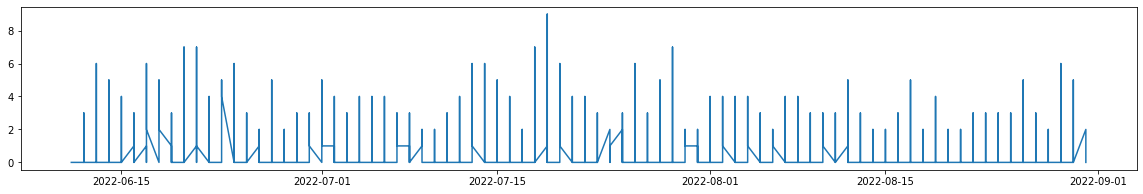

In [21]:
fig, ax = plt.subplots(figsize=(20, 3))
xpoints = df_ts_trendy['date']
ypoints = df_ts_trendy['trips']

plt.plot(xpoints, ypoints)
plt.show()

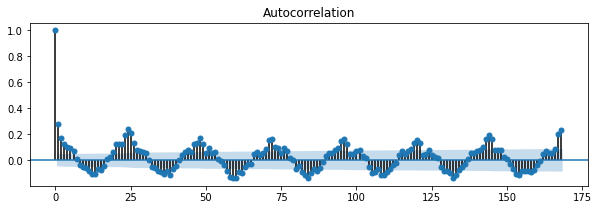

In [22]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_acf(df_ts_trendy.trips, ax=ax, lags=7*24)
plt.show()

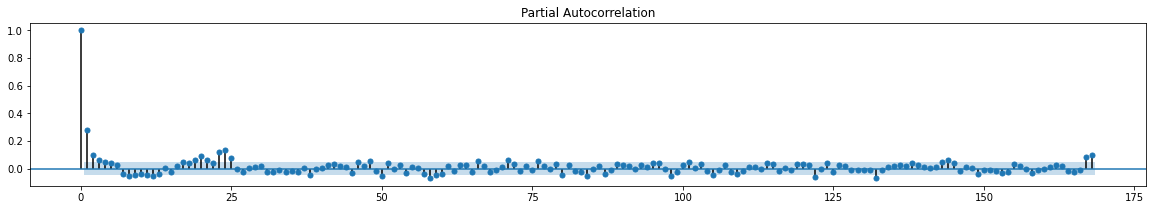

In [23]:
fig, ax = plt.subplots(figsize=(20, 3))
plot_pacf(df_ts_trendy.trips, ax=ax, lags=7*24)
plt.show()

As we can see in acf and pacf there is not a big correlation between the demand the day before or the demand 7 days before

# Time series - Grouped

Now check if at least there is a correlation between all day data

In [24]:
df_ts.groupby(['datetime'])['trips'].sum().reset_index()

,datetime,trips
0,2022-06-11 00,0
1,2022-06-11 01,0
2,2022-06-11 02,0
3,2022-06-11 03,0
4,2022-06-11 04,0
...,...,...
1963,2022-08-31 19,0
1964,2022-08-31 20,0
1965,2022-08-31 21,0
1966,2022-08-31 22,0


In [25]:
#Set the column datetime as index and sort the dataset by datetime ascendent
df_ts.set_index('datetime', inplace=True)
df_ts.sort_index(inplace=True)

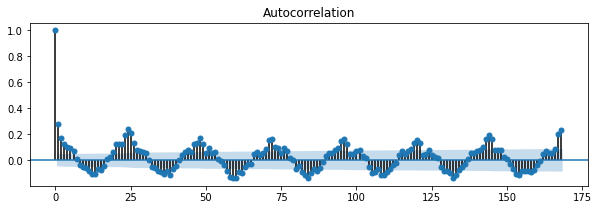

In [26]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_acf(df_ts_trendy.trips, ax=ax, lags=7*24)
plt.show()

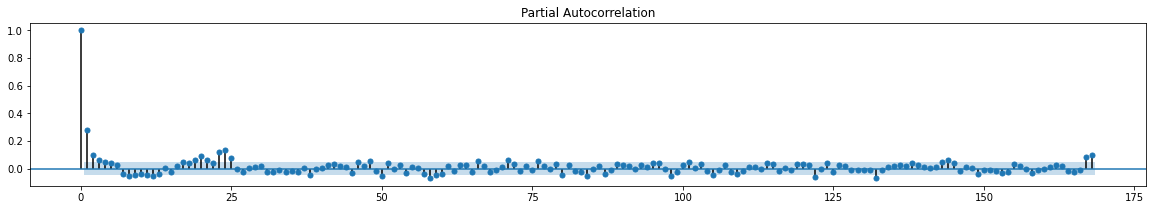

In [27]:
fig, ax = plt.subplots(figsize=(20, 3))
plot_pacf(df_ts_trendy.trips, ax=ax, lags=7*24)
plt.show()

# Time series - Only true/false

In [28]:
query = """
SELECT 
    latitude_start_r,
    longitude_start_r,
    hour,
    date,
    CASE WHEN trips >0 THEN True ELSE  False END AS  exist_trip  
  FROM `vacio-276411.mainDataset.V2_model_data_latlon2_hour_trips_MADRID`
"""
df_true_false = client.query(query).to_dataframe()

In [29]:
##Convert latitude and longitude to number
df_true_false['latitude_start_r'] = df_true_false['latitude_start_r'].astype(str).astype(float)
df_true_false['longitude_start_r'] = df_true_false['longitude_start_r'].astype(str).astype(float)
#Convert date colum to datetime type
df_true_false["date"] = pd.to_datetime(df_true_false["date"], format='%Y-%m-%d')

In [30]:
df_true_false.dtypes

latitude_start_r            float64
longitude_start_r           float64
hour                          int64
date                 datetime64[ns]
exist_trip                     bool
dtype: object

In [31]:
#Create datetime colum
df_true_false["datetime"]  = df_true_false["date"].dt.strftime('%Y-%m-%d') + " " + df_true_false["hour"].apply(str).str.zfill(2)
pd.to_datetime(df_true_false["datetime"])
df_true_false

,latitude_start_r,longitude_start_r,hour,date,exist_trip,datetime
0,40.43,-3.70,0,2022-06-11,False,2022-06-11 00
1,40.43,-3.70,1,2022-06-11,False,2022-06-11 01
2,40.43,-3.70,2,2022-06-11,False,2022-06-11 02
3,40.43,-3.70,3,2022-06-11,False,2022-06-11 03
4,40.43,-3.70,4,2022-06-11,False,2022-06-11 04
...,...,...,...,...,...,...
289291,40.49,-3.68,19,2022-08-31,False,2022-08-31 19
289292,40.49,-3.68,20,2022-08-31,False,2022-08-31 20
289293,40.49,-3.68,21,2022-08-31,False,2022-08-31 21
289294,40.49,-3.68,22,2022-08-31,False,2022-08-31 22


In [32]:
#Select a interesting point of data
df_ts_trendy_true_false =  df_true_false[ (df_true_false.latitude_start_r == 40.44) & (df_true_false.longitude_start_r == -3.68)]
df_ts_trendy_true_false

,latitude_start_r,longitude_start_r,hour,date,exist_trip,datetime
116112,40.44,-3.68,0,2022-06-11,False,2022-06-11 00
116113,40.44,-3.68,1,2022-06-11,False,2022-06-11 01
116114,40.44,-3.68,2,2022-06-11,False,2022-06-11 02
116115,40.44,-3.68,3,2022-06-11,False,2022-06-11 03
116116,40.44,-3.68,4,2022-06-11,False,2022-06-11 04
...,...,...,...,...,...,...
118075,40.44,-3.68,19,2022-08-31,False,2022-08-31 19
118076,40.44,-3.68,20,2022-08-31,False,2022-08-31 20
118077,40.44,-3.68,21,2022-08-31,False,2022-08-31 21
118078,40.44,-3.68,22,2022-08-31,False,2022-08-31 22


In [33]:
#Set the column datetime as index and sort the dataset by datetime ascendent
df_ts_trendy_true_false.set_index('datetime', inplace=True)
df_ts_trendy_true_false.sort_index(inplace=True)

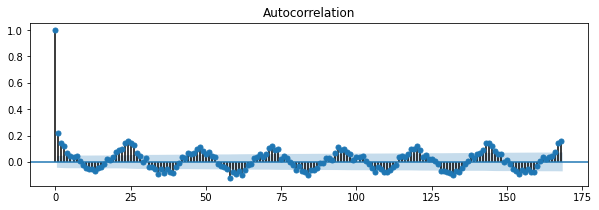

In [34]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_acf(df_ts_trendy_true_false.exist_trip, ax=ax, lags=7*24)
plt.show()

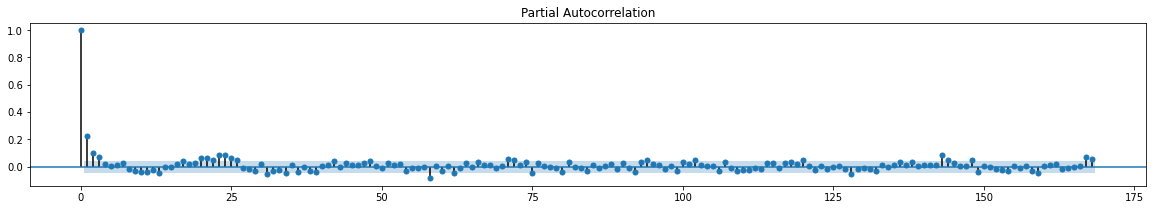

In [35]:
fig, ax = plt.subplots(figsize=(20, 3))
plot_pacf(df_ts_trendy_true_false.exist_trip, ax=ax, lags=7*24)
plt.show()

# Adfuller test

In [36]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df_ts_trendy['trips'])
results

(-5.425759777896332,
 2.9898063506360312e-06,
 24,
 1943,
 {'1%': -3.433720025866274,
  '5%': -2.863028672007412,
  '10%': -2.567562509368256},
 5925.911012749962)

Adfuller tells:
- Frist number (-4.68) --> More negative means more likely to be stationary
- P-value (9.13e-05) --> If smaller than 0.05 we reject the null hypothesis and assume that must by stationary
- Critical values of the test statistic wich equate to different p-values
- This should be below -2.91

